In [1]:
# from dendrotweaks.file_managers.mod_manager.reader import MODReader
# from dendrotweaks.file_managers.mod_manager.parser import MODParser
# from dendrotweaks.file_managers.mod_manager.code_generator import CodeGenerator
import dendrotweaks as dd

In [2]:
modm = dd.file_managers.MODManager()

In [3]:
modm.info()

MOD MANAGER

Path to data: data/
Simulator: NEURON

Available archives:
{'Base': ['Leak'],
 'Park_2019': ['Na', 'KCa', 'Kv', 'Ka', 'CaHVA', 'Km', 'CaLVA'],
 'Park_test': ['Na', 'Kv']}

READ      : False
PARSED    : False
GENERATED : False


In [4]:
modm.list_archives()

{'Base': ['Leak'],
 'Park_2019': ['Na', 'KCa', 'Kv', 'Ka', 'CaHVA', 'Km', 'CaLVA'],
 'Park_test': ['Na', 'Kv']}

In [5]:
modm._replace_suffix_with_name(archive="Park_test")

Replacing SUFFIX na with SUFFIX Na
Saved changes to data/mod/Park_test/Na.mod
Replacing SUFFIX Kv with SUFFIX Kv
Saved changes to data/mod/Park_test/Kv.mod


# Preprocessing

In [21]:
mechanism_name = 'Kv'
archive_name='Park_test'
path_to_mod_file = f'data/mod/{archive_name}/{mechanism_name}.mod'.replace('//', '/')
modm.read(path_to_mod_file)
# modm.parse()
# modm.ast_to_python()

In [22]:
modm.reader.info()


READER

Path to file: data/mod/Park_test/Kv.mod
1 - TITLE
1 - COMMENT
1 - NEURON
1 - UNITS
1 - PARAMETER
1 - ASSIGNED
1 - STATE
1 - BREAKPOINT
1 - DERIVATIVE
1 - INITIAL
1 - FUNCTION
1 - PROCEDURE
0 - KINETIC
No unmatched content.


In [23]:
modm.blocks

{'TITLE': ['TITLE Kv_Park_ref\n'],
 'COMMENT': ['COMMENT\n26 Ago 2002 Modification of original channel to allow variable time step and to correct an initialization error.\n    Done by Michael Hines(michael.hines@yale.e) and Ruggero Scorcioni(rscorcio@gmu.edu) at EU Advance Course in Computational Neuroscience. Obidos, Portugal\n\nkv.mod\n\nPotassium channel, Hodgkin-Huxley style kinetics\nKinetic rates based roughly on Sah et al. and Hamill et al. (1991)\n\nAuthor\nENDCOMMENT'],
 'NEURON': ['NEURON {\n\tSUFFIX Kv\n\tUSEION k READ ek WRITE ik\n\tRANGE gbar, i, v12, q\n}'],
 'UNITS': ['UNITS {\n\t(mA) = (milliamp)\n\t(mV) = (millivolt)\n\t(S)  = (siemens)\n\t(um) = (micron)\n}'],
 'PARAMETER': ['PARAMETER {\n\tgbar = 0.0   (S/cm2)                                                                                      \n\tRa   = 0.02  (/mV/ms) \n\tRb   = 0.006 (/mV/ms) \n\tv12  = 25    (mV)\t  \n\tq    = 9     (mV)     \n\ttemp = 23    (degC)   \n\tq10  = 2.3   (1)\t  \n}'],
 'ASSIGNED': ['A

# Parsing

In [24]:
modm.parse()

In [25]:
modm.parser.info()


PARSER

File parsed: True
1 - TITLE
1 - COMMENT
1 - NEURON
1 - UNITS
1 - PARAMETER
1 - ASSIGNED
1 - STATE
1 - BREAKPOINT
1 - DERIVATIVE
1 - INITIAL
1 - FUNCTION
1 - PROCEDURE


In [26]:
modm.ast['NEURON']

{'suffix': 'Kv',
 'useion': [{'ion': 'k', 'read': ['ek'], 'write': ['ik']}],
 'range': ['gbar', 'i', 'v12', 'q']}

In [27]:
modm.ast['STATE']

{'n': 1}

In [28]:
modm.ast['PROCEDURE'][0]

{'signature': {'f_name': 'rates', 'args': [{'name': 'v', 'unit': 'mV'}]},
 'locals': ['alpn', 'betn'],
 'assignment_statements': [{'assigned_var': 'tadj',
   'expression': {'^': ['q10', {'/': [{'-': ['celsius', 'temp']}, 10]}]}},
  {'assigned_var': 'alpn',
   'expression': {'rateconst': ['v', 'Ra', 'v12', 'q']}},
  {'assigned_var': 'betn',
   'expression': {'rateconst': ['v', {'-': ['Rb']}, 'v12', {'-': ['q']}]}},
  {'assigned_var': 'nTau',
   'expression': {'/': [1, {'*': ['tadj', {'+': ['alpn', 'betn']}]}]}},
  {'assigned_var': 'nInf',
   'expression': {'/': ['alpn', {'+': ['alpn', 'betn']}]}}],
 'statements': [{'assigned_var': 'tadj',
   'expression': {'^': ['q10', {'/': [{'-': ['celsius', 'temp']}, 10]}]}},
  {'assigned_var': 'alpn',
   'expression': {'rateconst': ['v', 'Ra', 'v12', 'q']}},
  {'assigned_var': 'betn',
   'expression': {'rateconst': ['v', {'-': ['Rb']}, 'v12', {'-': ['q']}]}},
  {'assigned_var': 'nTau',
   'expression': {'/': [1, {'*': ['tadj', {'+': ['alpn', 'betn']

# Generate python code

In [29]:
modm.ast_to_python()

In [30]:
modm.code_generator.info()


GENERATOR

Template: dendrotweaks/file_managers/mod_manager/templates/template_dd.py
Library: np
Code is generated: True


In [31]:
path_to_file = f'data/collection/{archive_name}/{mechanism_name}.py'
modm.write(path_to_file)

Saved content to data/collection/Park_test/Kv.py


# Test the channel

In [32]:
from data.collection.Park_test.Na import Na
from data.collection.Park_test.Kv import Kv
import numpy as np

In [33]:
kv = Kv()
na = Na()

In [34]:
kv.name, na.name

('Kv', 'Na')

In [35]:
v = np.linspace(-100, 100, 1000)

In [36]:
data = kv.get_data(v)

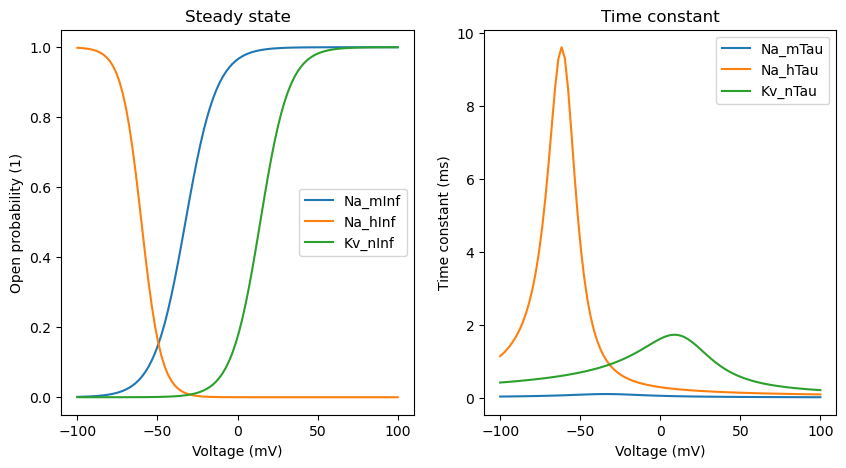

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
na.plot_kinetic_variables(ax)
kv.plot_kinetic_variables(ax)